## Imports 

In [15]:
import common.feature_num as feature_num
import common.feature_categorica as feature_categorica
import common.common_machine_learning as common
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

### Ignore Warnings 

In [2]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

## Constantes

## Set de datos 

In [102]:
train = common.cargar_set_optimizado('sets_de_datos/train.csv', index_col = 0)
X_test = common.cargar_set_optimizado('sets_de_datos/test.csv', index_col = 0)
train_mod = train.copy()

Analizar nuevas features:  
* Precio segun año => Como año
* Precio segun mes => OHE
* Precio segun provincia con mas de 1000 registros => OHE
* Precio segun ciudad con mas de 1000 registros => OHE
* Precio segun lat, lng => Rotaciones
* Precio segun idzona con mas de 
* Cero Garages, habitaciones, baños y no es Casa o Apartamento  
  
Extraer y generar csv's para los nuevos datos de Nicky

In [4]:
train_mod['cantidad'] = 1

In [5]:
train_mod = train_mod.drop(['cantidad'], axis = 1).merge(train_mod.groupby(['provincia'])['cantidad'].apply(lambda x: x.sum()), on = 'provincia')

In [6]:
train_mod = train_mod.loc[train_mod['cantidad'] > 5000]

In [7]:
train_mod = train_mod.drop(['cantidad'], axis = 1)
train_mod['cantidad'] = 1

In [8]:
train_mod = train_mod.drop(['cantidad'], axis = 1).merge(train_mod.groupby(['provincia', 'ciudad']).agg({'cantidad' : 'sum'}), on = 'ciudad')

In [9]:
train_mod['cantidad'].max()

12646

In [10]:
train_mod['cantidad'].min()

1

In [11]:
train_mod['cantidad'].mean()

5307.231511419569

In [20]:
train_mod = train_mod.loc[train_mod['cantidad'] > 5000]

In [13]:
train_mod.shape

(146016, 23)

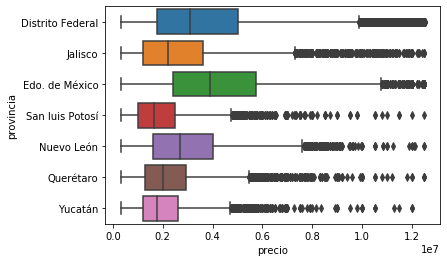

In [21]:
sns.boxplot(y = 'provincia', x = 'precio', data = train_mod)

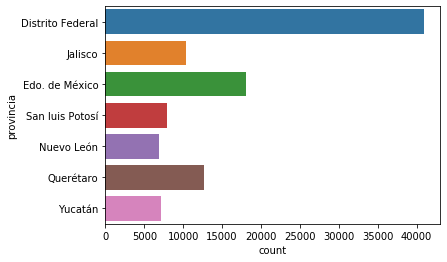

In [32]:
sns.countplot(y = 'provincia', data = train_mod)

In [27]:
(train_mod['provincia'] == 'Distrito Federal').sum()

40993

In [29]:
(train_mod['provincia'] == 'Edo. de México').sum()

18055

In [42]:
(train_mod['provincia'] == 'San luis Potosí').sum()

7925

In [64]:
(train_mod['provincia'] == 'Yucatán').sum()

7162

In [65]:
(train_mod['provincia'] == 'Querétaro').sum()

12646

In [76]:
provincias_feature = ['Distrito Federal', 'Edo. de México', 'San luis Potosí', 'Yucatán', 'Querétaro']

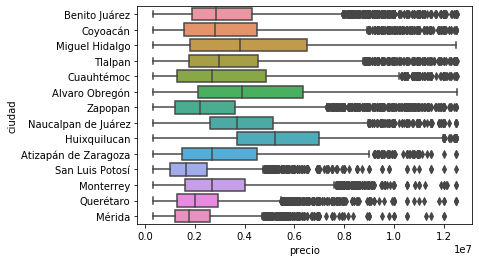

In [22]:
sns.boxplot(x = 'precio', y = 'ciudad', data = train_mod)

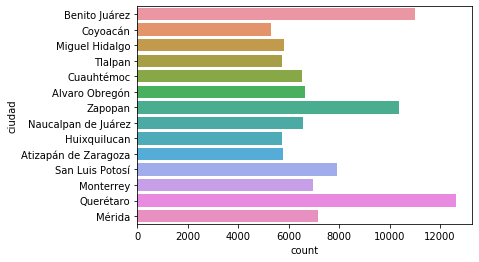

In [33]:
sns.countplot(y = 'ciudad', data = train_mod)

In [41]:
(train_mod['ciudad'] == 'San Luis Potosí').sum()

7925

In [46]:
(train_mod['ciudad'] == 'Zapopan').sum()

10360

In [47]:
(train_mod['ciudad'] == 'Huixquilucan').sum()

5718

In [49]:
(train_mod['ciudad'] == 'Querétaro').sum()

12646

In [50]:
(train_mod['ciudad'] == 'Mérida').sum()

7162

In [209]:
train_feature_1 = train.copy()

In [210]:
ciudades_feature = ['San Luis Potosí', 'Querétaro', 'Zapopan', 'Huixquilucan', 'Mérida']

In [211]:
provincias_feature

['Distrito Federal',
 'Edo. de México',
 'San luis Potosí',
 'Yucatán',
 'Querétaro']

In [212]:
ciudades_feature

['San Luis Potosí', 'Querétaro', 'Zapopan', 'Huixquilucan', 'Mérida']

In [213]:
ciudades_feature_test = []
for ciudad in ciudades_feature:
    if ciudad in X_test['ciudad'].unique():
        ciudades_feature_test.append(ciudad)
provincias_feature_test = []
for provincia in provincias_feature:
    if provincia in X_test['provincia'].unique():
        provincias_feature_test.append(provincia)

In [214]:
ciudades_feature_test

['San Luis Potosí', 'Querétaro', 'Zapopan', 'Huixquilucan', 'Mérida']

In [215]:
provincias_feature_test

['Distrito Federal',
 'Edo. de México',
 'San luis Potosí',
 'Yucatán',
 'Querétaro']

In [216]:
ciudades_feature_nombre = []
for ciudad in ciudades_feature_test:
    nombre_feature = 'ciudad_' + "_".join(ciudad.split(' ')) 
    train_feature_1[nombre_feature] = train_feature_1['ciudad'].transform(lambda x: 1 if x == ciudad else 0)
    ciudades_feature_nombre.append(nombre_feature)
provincias_feature_nombre = []
for provincia in provincias_feature_test:
    nombre_feature = 'provincia_' + "_".join(provincia.split(' '))
    train_feature_1[nombre_feature] = train_feature_1['provincia'].transform(lambda x: 1 if x == provincia else 0)
    provincias_feature_nombre.append(nombre_feature)
    

In [218]:
ciudades_feature_nombre = []
for ciudad in ciudades_feature_test:
    nombre_feature = 'ciudad_' + "_".join(ciudad.split(' ')) 
    X_test[nombre_feature] = X_test['ciudad'].transform(lambda x: 1 if x == ciudad else 0)
    ciudades_feature_nombre.append(nombre_feature)
provincias_feature_nombre = []
for provincia in provincias_feature_test:
    nombre_feature = 'provincia_' + "_".join(provincia.split(' '))
    X_test[nombre_feature] = X_test['provincia'].transform(lambda x: 1 if x == provincia else 0)
    provincias_feature_nombre.append(nombre_feature)

In [217]:
train_feature_1.columns

Index(['titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio', 'ciudad_San_Luis_Potosí',
       'ciudad_Querétaro', 'ciudad_Zapopan', 'ciudad_Huixquilucan',
       'ciudad_Mérida', 'provincia_Distrito_Federal',
       'provincia_Edo._de_México', 'provincia_San_luis_Potosí',
       'provincia_Yucatán', 'provincia_Querétaro'],
      dtype='object')

In [121]:
for ciudad in ciudades_feature_test:
    print(train_feature_1['ciudad_' + "_".join(ciudad.split(' '))].sum())

7925
12646
10360
5718
7162


In [122]:
for provincia in provincias_feature_test:
    print(train_feature_1['provincia_' + "_".join(provincia.split(' '))].sum())

58790
41607
8447
7928
16988


In [123]:
train_feature_1 = train_feature_1[ciudades_feature_nombre + provincias_feature_nombre]

In [219]:
X_test = X_test[ciudades_feature_nombre + provincias_feature_nombre]

In [124]:
train_feature_1.shape

(240000, 10)

In [129]:
df = pd.read_csv('data/feature_provincias_ciudades_ohe_reducida.csv', index_col = 0)
train.merge(df, on = 'id').shape

(240000, 32)

In [130]:
train_mod_2 = train.copy()

In [131]:
feature_num.agregar_feature_fecha_numerica(train_mod_2)

In [136]:
train_mod_2['fecha_str'] = train_mod_2['fecha_numerica'].astype(str) 

In [140]:
train_mod_2['año'] = train_mod_2['fecha_str'].transform(lambda x: x[:4])
train_mod_2['mes'] = train_mod_2['fecha_str'].transform(lambda x: x[4:6])
train_mod_2['dia'] = train_mod_2['fecha_str'].transform(lambda x: x[6:])

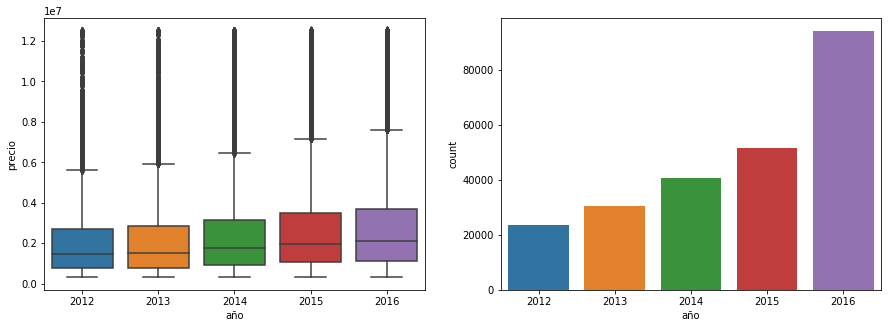

In [152]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.boxplot(x = 'año', y = 'precio', data = train_mod_2, ax = ax[0])
sns.countplot(x = 'año', data = train_mod_2, ax = ax[1])

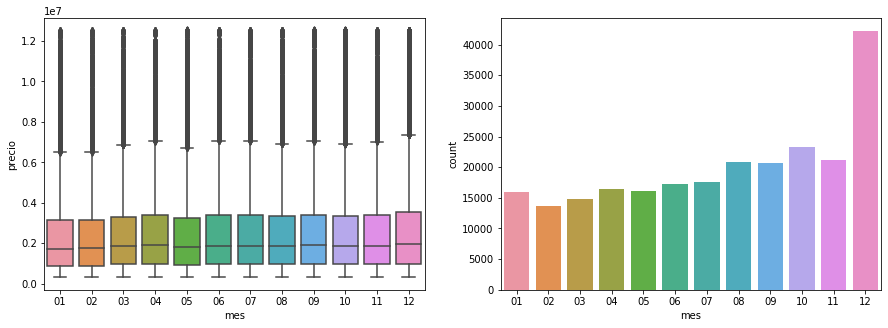

In [153]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.boxplot(x = 'mes', y = 'precio', data = train_mod_2, ax = ax[0])
sns.countplot(x = 'mes', data = train_mod_2, ax = ax[1])

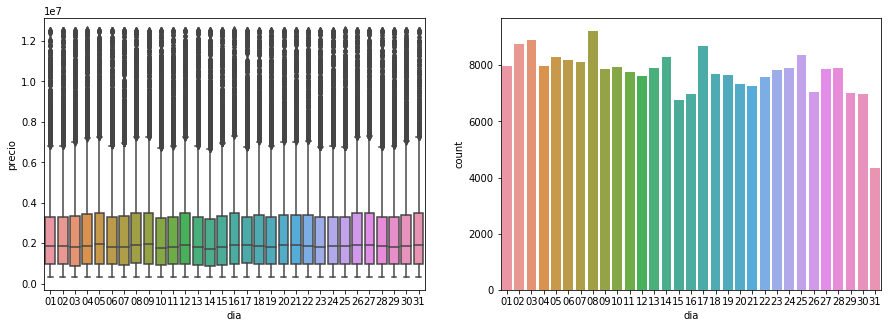

In [154]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.boxplot(x = 'dia', y = 'precio', data = train_mod_2, ax = ax[0])
sns.countplot(x = 'dia', data = train_mod_2, ax = ax[1])

In [155]:
train_mod_2['año_mes'] = train_mod_2['año'] + train_mod_2['mes']

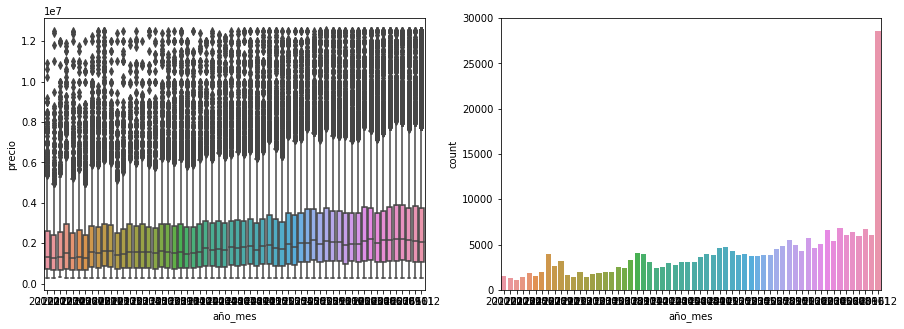

In [159]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.boxplot(x = 'año_mes', y = 'precio', data = train_mod_2, ax = ax[0])
sns.countplot(x = 'año_mes', data = train_mod_2, ax = ax[1])

In [165]:
train_mod_3 = train.copy()

In [184]:
train_mod_3 = train_mod_3.merge(train_mod_3.groupby(['provincia', 'ciudad']).agg({'idzona' : 'std'}).rename(columns = {'idzona' : 'idzona_std'}), on = ['provincia', 'ciudad'])

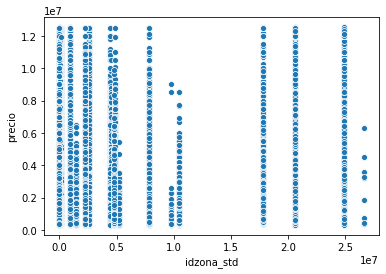

In [185]:
sns.scatterplot(x = 'idzona_std', y = 'precio', data = train_mod_3)

In [186]:
train_mod_4 = train.copy()

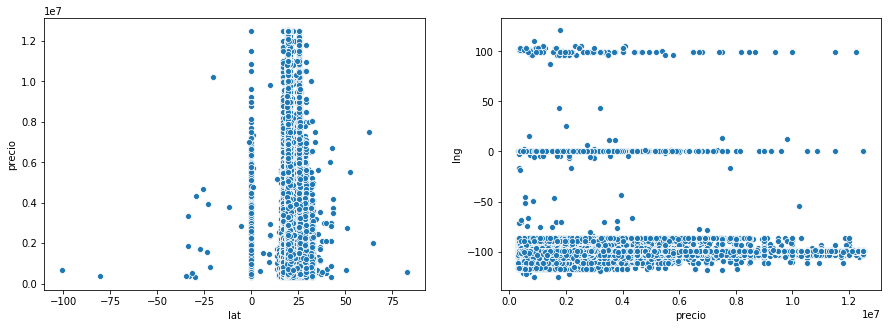

In [190]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.scatterplot(x = 'lat', y = 'precio', data = train_mod_4, ax = ax[0])
sns.scatterplot(x = 'precio', y = 'lng', data = train_mod_4, ax = ax[1])

In [191]:
train_mod_5 = train.copy()

In [192]:
train_mod_5['cantidad_espacios'] = train_mod_5['habitaciones'] + train_mod_5['banos'] + train_mod_5['garages'] 

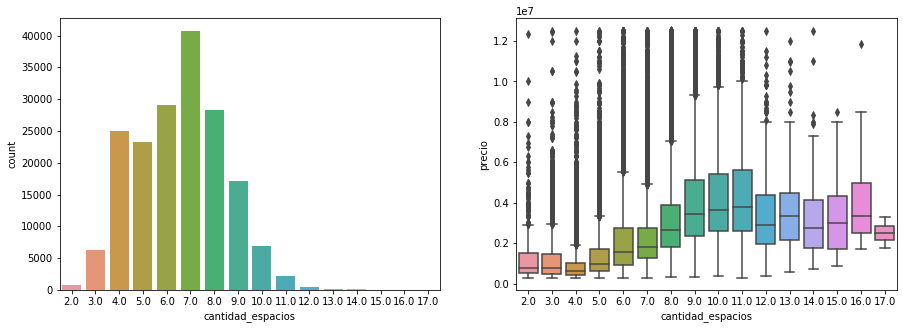

In [197]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.countplot(x = 'cantidad_espacios', data = train_mod_5, ax = ax[0])
sns.boxplot(x = 'cantidad_espacios', y = 'precio', data = train_mod_5, ax = ax[1])

In [199]:
train_mod_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240000 entries, 254099 to 121958
Data columns (total 23 columns):
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float16
habitaciones                  217529 non-null float16
garages                       202235 non-null float16
banos                         213779 non-null float16
metroscubiertos               222600 non-null float16
metrostotales                 188533 non-null float16
idzona                        211379 non-null float32
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240000 non-null datetime64[ns]
gimnasio           

In [206]:
train_mod_5['cantidad_extras'] =\
    train_mod_5['gimnasio'].astype(int)\
    + train_mod_5['usosmultiples'].astype(int)\
    + train_mod_5['piscina'].astype(int)\
    + train_mod_5['escuelascercanas'].astype(int)\
    + train_mod_5['centroscomercialescercanos'].astype(int) 

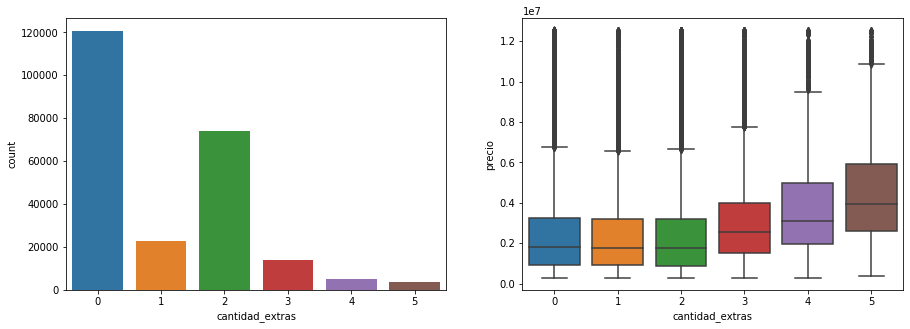

In [207]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.countplot(x = 'cantidad_extras', data = train_mod_5, ax = ax[0])
sns.boxplot(x = 'cantidad_extras', y = 'precio', data = train_mod_5, ax = ax[1])